In [1]:
# Start loading libraries
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

# 1.LOADING AND PREPROCESSING DATA

In [2]:
df_oil = fdr.DataReader('LCO') # Oil Price
df_PVS = fdr.DataReader('PVS') # PVS Price
df_PVD = fdr.DataReader('PVD') # PVD Price
df_PLX = fdr.DataReader('PLX', exchange = "HOSE") # PLX Price

In [3]:
df_oil.to_csv("LCO.csv")
df_oil

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1988-06-27,15.10,15.10,15.10,15.10,50.0,-0.0351
1988-06-28,15.27,15.34,15.36,15.27,160.0,0.0113
1988-06-30,14.85,14.80,14.90,14.80,420.0,-0.0401
1988-07-01,14.60,14.60,14.60,14.60,50.0,-0.0168
1988-07-04,14.35,14.50,14.50,14.30,170.0,-0.0171
...,...,...,...,...,...,...
2022-06-15,118.51,120.79,121.88,117.75,231060.0,-0.0220
2022-06-16,119.81,119.65,120.29,115.56,276680.0,0.0110
2022-06-17,113.12,119.13,121.25,111.72,319910.0,-0.0558


In [4]:
df_PVS.to_csv("PVS.csv")
df_PVS

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2007-09-21,31422.0,31819.0,32190.0,30952.0,368320.0,0.0071
2007-09-24,31398.0,32190.0,32190.0,31200.0,331640.0,-0.0008
2007-09-25,31645.0,31398.0,31695.0,31076.0,623910.0,0.0079
2007-09-26,31447.0,31695.0,31942.0,31348.0,568110.0,-0.0063
2007-09-27,31819.0,31695.0,31819.0,31546.0,627510.0,0.0118
...,...,...,...,...,...,...
2022-06-16,30600.0,30000.0,31600.0,29300.0,17230000.0,0.0303
2022-06-17,30400.0,30400.0,31200.0,29000.0,11520000.0,-0.0065
2022-06-20,27400.0,29800.0,29800.0,27400.0,13440000.0,-0.0987


In [5]:
df_PVD.to_csv("PVD.csv")
df_PVD

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2013-07-29,35286.0,35214.0,35717.0,35214.0,146860.0,-0.0160
2013-07-30,35932.0,35214.0,37010.0,35214.0,250090.0,0.0183
2013-07-31,36292.0,35789.0,36651.0,35789.0,260500.0,0.0100
2013-08-01,36651.0,35932.0,37010.0,35932.0,113350.0,0.0099
2013-08-02,37010.0,37010.0,37010.0,36292.0,242860.0,0.0098
...,...,...,...,...,...,...
2022-06-16,21000.0,21150.0,21950.0,20700.0,9370000.0,0.0024
2022-06-17,20000.0,20200.0,20900.0,19550.0,14600000.0,-0.0476
2022-06-20,18600.0,19150.0,19500.0,18600.0,9780000.0,-0.0700


In [6]:
df_PLX.to_csv("PLX.csv")
df_PLX

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-04-24,48400.0,48900.0,49500.0,48000.0,1760000.0,-0.0102
2017-04-25,45150.0,48100.0,48400.0,45050.0,2530000.0,-0.0671
2017-04-26,44100.0,43100.0,44500.0,43100.0,1740000.0,-0.0233
2017-04-27,45900.0,44100.0,45900.0,44100.0,825430.0,0.0408
2017-04-28,46650.0,46100.0,47000.0,46100.0,781910.0,0.0163
...,...,...,...,...,...,...
2022-06-16,42050.0,42200.0,42400.0,41800.0,817400.0,0.0256
2022-06-17,41900.0,40600.0,42000.0,40600.0,1110000.0,-0.0036
2022-06-20,39250.0,41600.0,41600.0,39250.0,1240000.0,-0.0632


In [7]:
# Read oil price and transform data
oil = pd.read_csv("LCO.csv") # Read Excel
oil = oil.iloc[:,:2] # Take Date and Close Columns
oil["Date"] = oil["Date"].astype('datetime64[ns]')  # Convert column to date format
oil.columns = ['Date', 'Oil Price'] # Rename the columns
oil["Oil Price"] = oil["Oil Price"]*23230
oil

,Date,Oil Price
0,1988-06-27,350773.0
1,1988-06-28,354722.1
2,1988-06-30,344965.5
3,1988-07-01,339158.0
4,1988-07-04,333350.5
...,...,...
8670,2022-06-15,2752987.3
8671,2022-06-16,2783186.3
8672,2022-06-17,2627777.6
8673,2022-06-20,2651239.9


In [8]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8675 non-null   datetime64[ns]
 1   Oil Price  8675 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 135.7 KB


In [9]:
# Loop to read all share price files and transform data
shares=["PVS","PVD","PLX"]
all_data=pd.DataFrame() # here we will store all the data from all shares and oil price in a master dataframe
for index in range(len(shares)):
    stock=pd.DataFrame()
# 1.- Read files
    stock=pd.read_csv(shares[index]+".csv")     
# 2.- Transform data
    stock=stock[["Date","Close"]]       
    stock["Date"]=stock["Date"].astype('datetime64[ns]')
    stock.columns=["Date","Share price"]
    test=pd.DataFrame(oil) # VLOOKUP equivalent in Python to merge 2 sets of data
    output=stock.merge(test,on="Date",how="left")
    stock["Oil Price"]=output["Oil Price"]
    stock['Share price']=pd.to_numeric(stock['Share price'], errors='coerce').dropna(0)
    stock['Oil Price']=pd.to_numeric(stock['Oil Price'], errors='coerce').dropna(0)
    stock["Year"]=pd.to_datetime(stock["Date"]).dt.year # Create a column with the year to filter later
    stock["Name"]=shares[index]
    stock = stock.dropna() # get rid of all the NAN rows.
# 3.- Feature Engineering. Create new column with scaled share price from 0 to 1.
#     This will help us comparing companies later on.
    from sklearn.preprocessing import MinMaxScaler
    scaler=MinMaxScaler()
    stock["Share price scaled"]=scaler.fit_transform(stock["Share price"].to_frame())
# 4.- Append data to a master dataframe
    all_data=all_data.append(stock) #append data to one matrix
    
all_data

,Date,Share price,Oil Price,Year,Name,Share price scaled
0,2007-09-21,31422.0,1842139.0,2007,PVS,0.692719
1,2007-09-24,31398.0,1833079.3,2007,PVS,0.692084
2,2007-09-25,31645.0,1803112.6,2007,PVS,0.698619
3,2007-09-26,31447.0,1798698.9,2007,PVS,0.693380
4,2007-09-27,31819.0,1859096.9,2007,PVS,0.703223
...,...,...,...,...,...,...
1285,2022-06-15,41000.0,2752987.3,2022,PLX,0.090750
1286,2022-06-16,42050.0,2783186.3,2022,PLX,0.109075
1287,2022-06-17,41900.0,2627777.6,2022,PLX,0.106457
1288,2022-06-20,39250.0,2651239.9,2022,PLX,0.060209


# 2.DATA ANALYSIS

## 2.1 Simple line plot oil price

<AxesSubplot:xlabel='Date'>

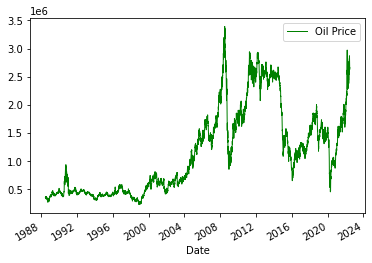

In [10]:
oil[['Date','Oil Price']].set_index('Date').plot(color="green", linewidth=1.0,)  

<AxesSubplot:xlabel='Date'>

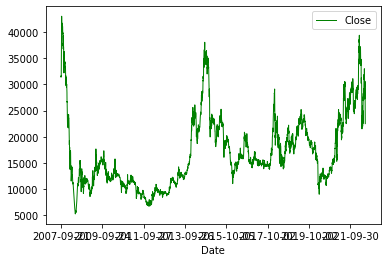

In [11]:
PVS = pd.read_csv("PVS.csv")
PVS[['Date',"Close"]].set_index('Date').plot(color="green", linewidth=1.0)  

<AxesSubplot:xlabel='Date'>

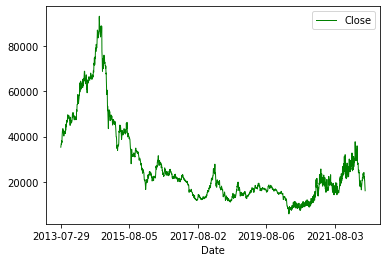

In [12]:
PVD = pd.read_csv("PVD.csv")
PVD[['Date','Close']].set_index('Date').plot(color="green", linewidth=1.0,)  

<AxesSubplot:xlabel='Date'>

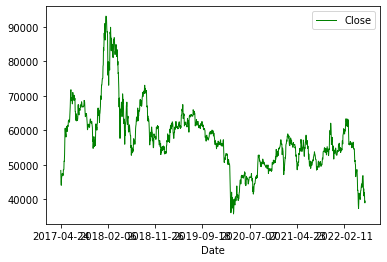

In [13]:
PLX = pd.read_csv("PLX.csv")
PLX[['Date','Close']].set_index('Date').plot(color="green", linewidth=1.0,)  

## 2.2 Pairplot on each share price using a color gradient for different years

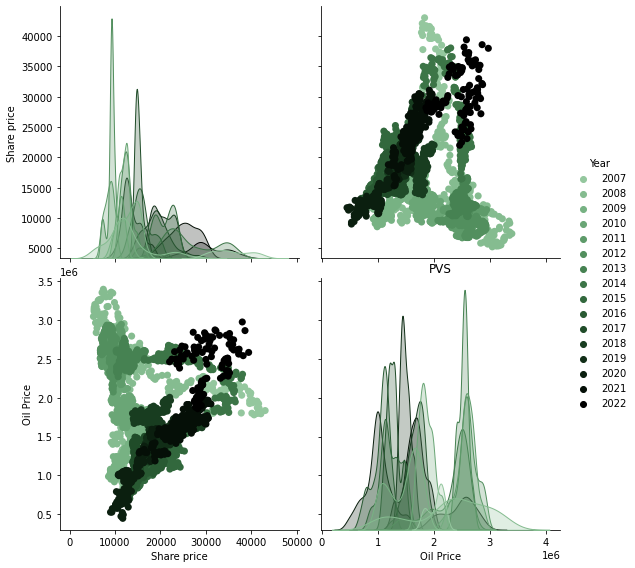

In [14]:
# PVS
palette=sns.cubehelix_palette(16, start=2, rot=0, dark=0, light=.7, reverse=False)
ax1 = sns.pairplot(all_data[all_data['Name']=="PVS"].drop(["Share price scaled"],axis=1),
                 hue="Year",palette=palette,size=4,markers="o",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=0))
ax1 = plt.title("PVS")

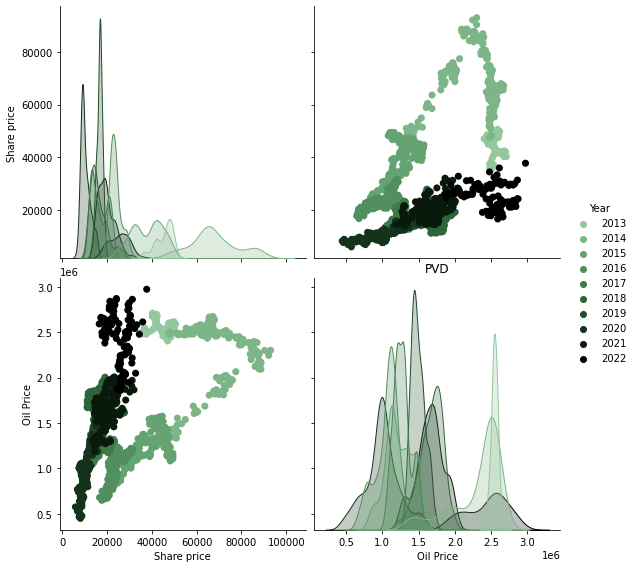

In [15]:
# PVD
palette=sns.cubehelix_palette(10, start=2, rot=0, dark=0, light=.7, reverse=False)
ax2 = sns.pairplot(all_data[all_data['Name']=="PVD"].drop(["Share price scaled"],axis=1),
                 hue="Year",palette=palette,size=4,markers="o",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=0))
ax2 = plt.title("PVD")

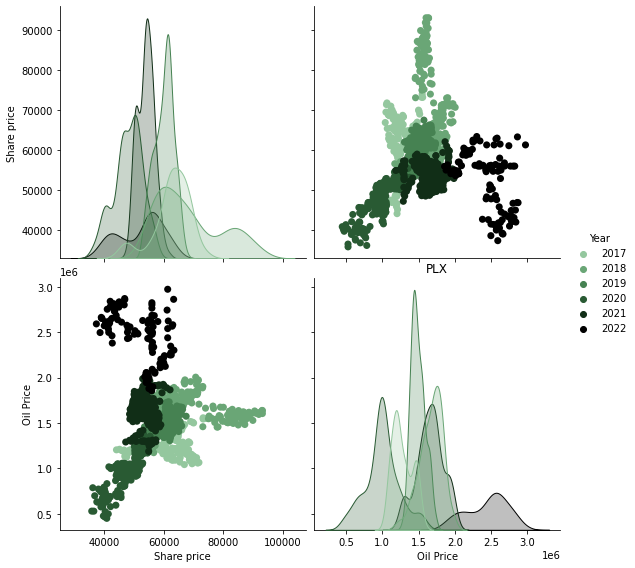

In [16]:
# PLX
palette=sns.cubehelix_palette(6, start=2, rot=0, dark=0, light=.7, reverse=False)
ax3 = sns.pairplot(all_data[all_data['Name']=="PLX"].drop(["Share price scaled"],axis=1),
                 hue="Year",palette=palette,size=4,markers="o",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=0))
ax3 = plt.title("PLX")

## 2.3 Pairplot on BP share price using last five years

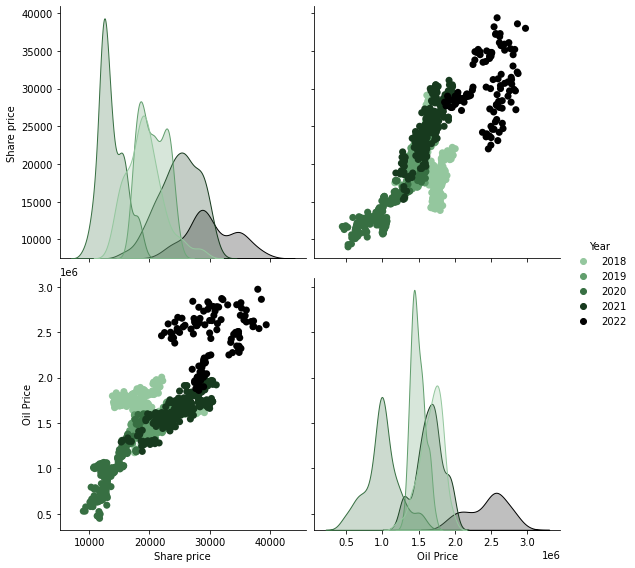

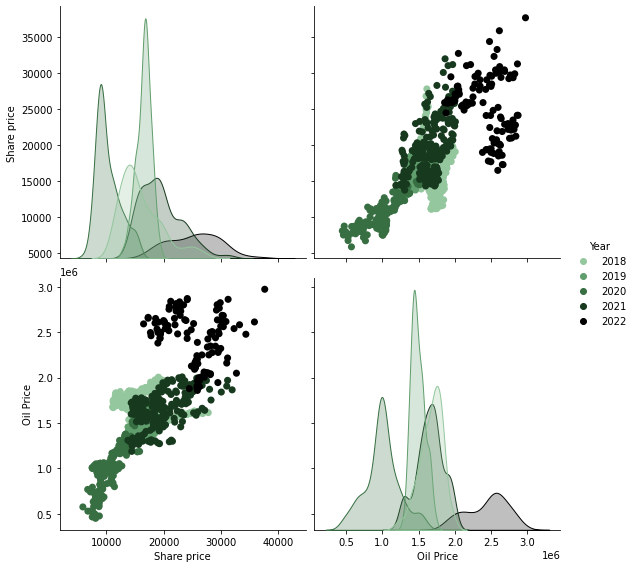

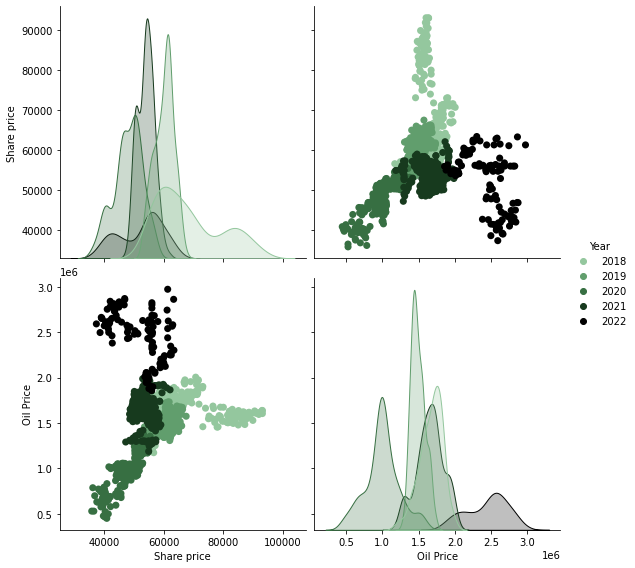

In [17]:
for index in range(len(shares)):
    # Just for the last 5 years
    all_data18=all_data[all_data["Year"]>2017]
    palette=sns.cubehelix_palette(5, start=2, rot=0, dark=0, light=.7, reverse=False)
    sns.pairplot(all_data18[all_data18['Name']== shares[index]].drop(["Share price scaled"],axis=1),
                 hue="Year",palette=palette,size=4,markers="o",
                 plot_kws=dict(s=50, edgecolor="b", linewidth=0))

## 2.4 Violin plot of the oil price

<AxesSubplot:xlabel='Year', ylabel='Oil Price'>

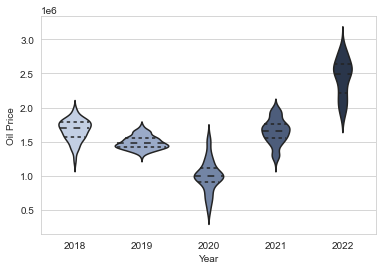

In [18]:
sns.set_style("whitegrid")
palette=sns.cubehelix_palette(5, start=2.8, rot=0, dark=0.2, light=0.8, reverse=False)
sns.violinplot(x="Year", y="Oil Price", data=all_data18[all_data18['Name']=="PVS"],
               inner="quart", palette=palette, trim=True)

## 2.5 Violin plot of the share price of several Oil and Gas companies

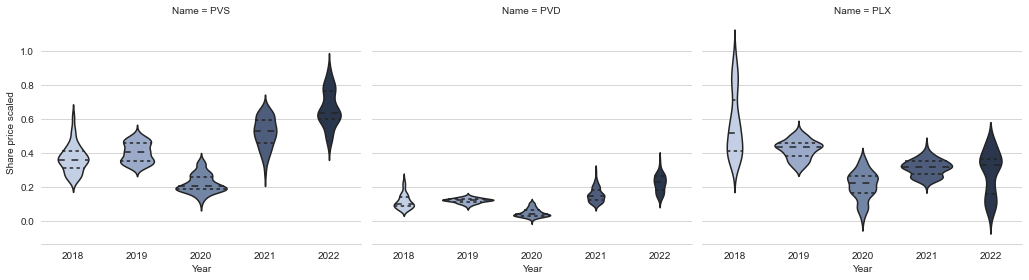

In [19]:
sns.factorplot(x="Year", y="Share price scaled", col='Name', col_wrap=3,kind="violin",
               split=True, data=all_data18,inner="quart", palette=palette, trim=True,size=4,aspect=1.2)
sns.despine(left=True)

## 2.6 Jointplot comparison of 3 companies

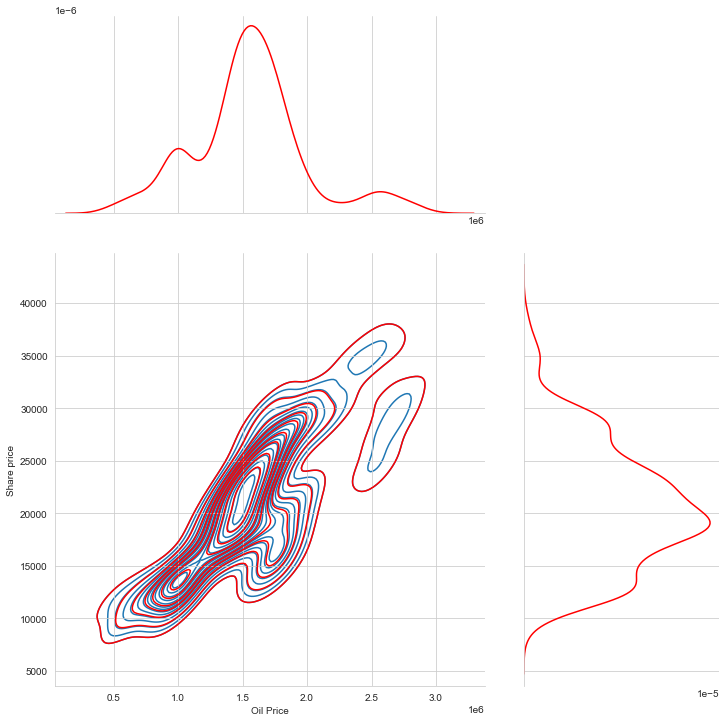

In [20]:
sns.jointplot("Oil Price", "Share price",data=all_data18[all_data18['Name']=="PVS"],kind="kde"
              ,size=10,ratio=2,color="red").plot_joint(sns.kdeplot, zorder=0, n_levels=20)

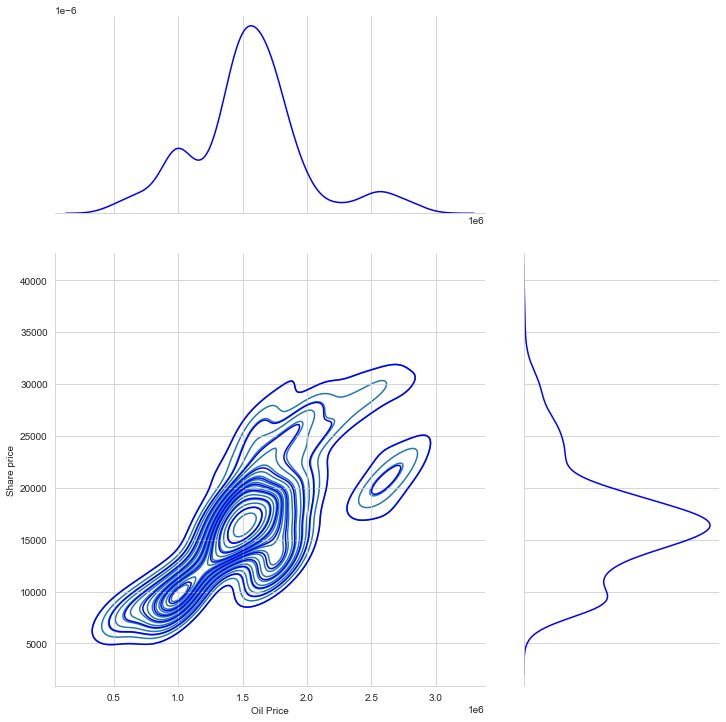

In [21]:
sns.jointplot("Oil Price", "Share price",data=all_data18[all_data18['Name']=="PVD"],kind="kde",
              size=10,ratio=2,color="blue").plot_joint(sns.kdeplot, zorder=0, n_levels=20)

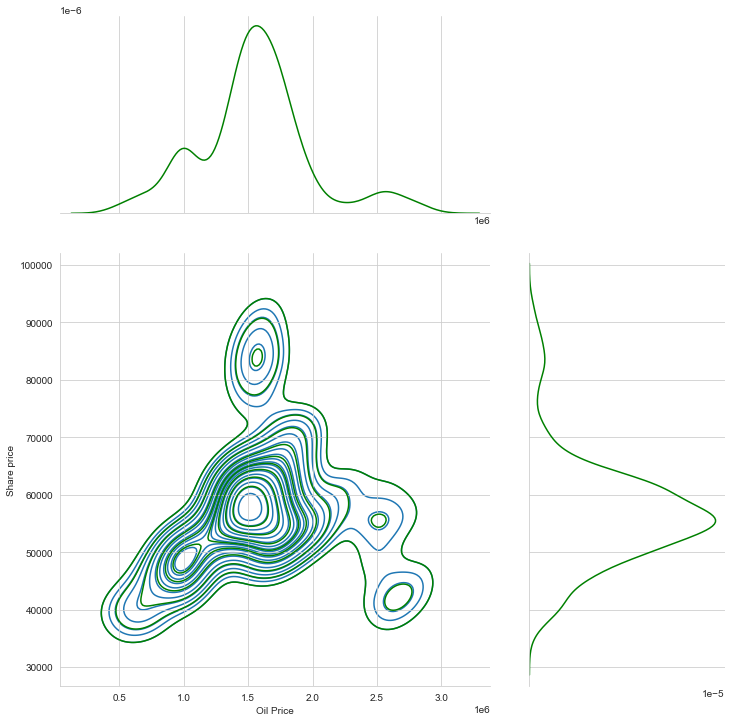

In [22]:
sns.jointplot("Oil Price", "Share price",data=all_data18[all_data18['Name']=="PLX"],kind="kde",
              size=10,ratio=2,color="green").plot_joint(sns.kdeplot, zorder=0, n_levels=20)

## 2.7 Plot of oil price vs share price of different companies using different templates

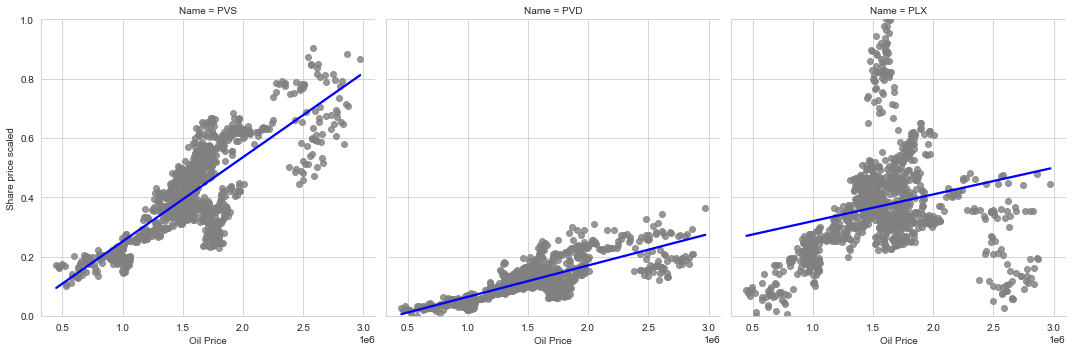

In [23]:
sns.lmplot(x="Oil Price", y="Share price scaled", col="Name",ci=None, col_wrap=3, 
           data=all_data18, order=1,line_kws={'color': 'blue'},scatter_kws={'color': 'grey'}).set(ylim=(0, 1))

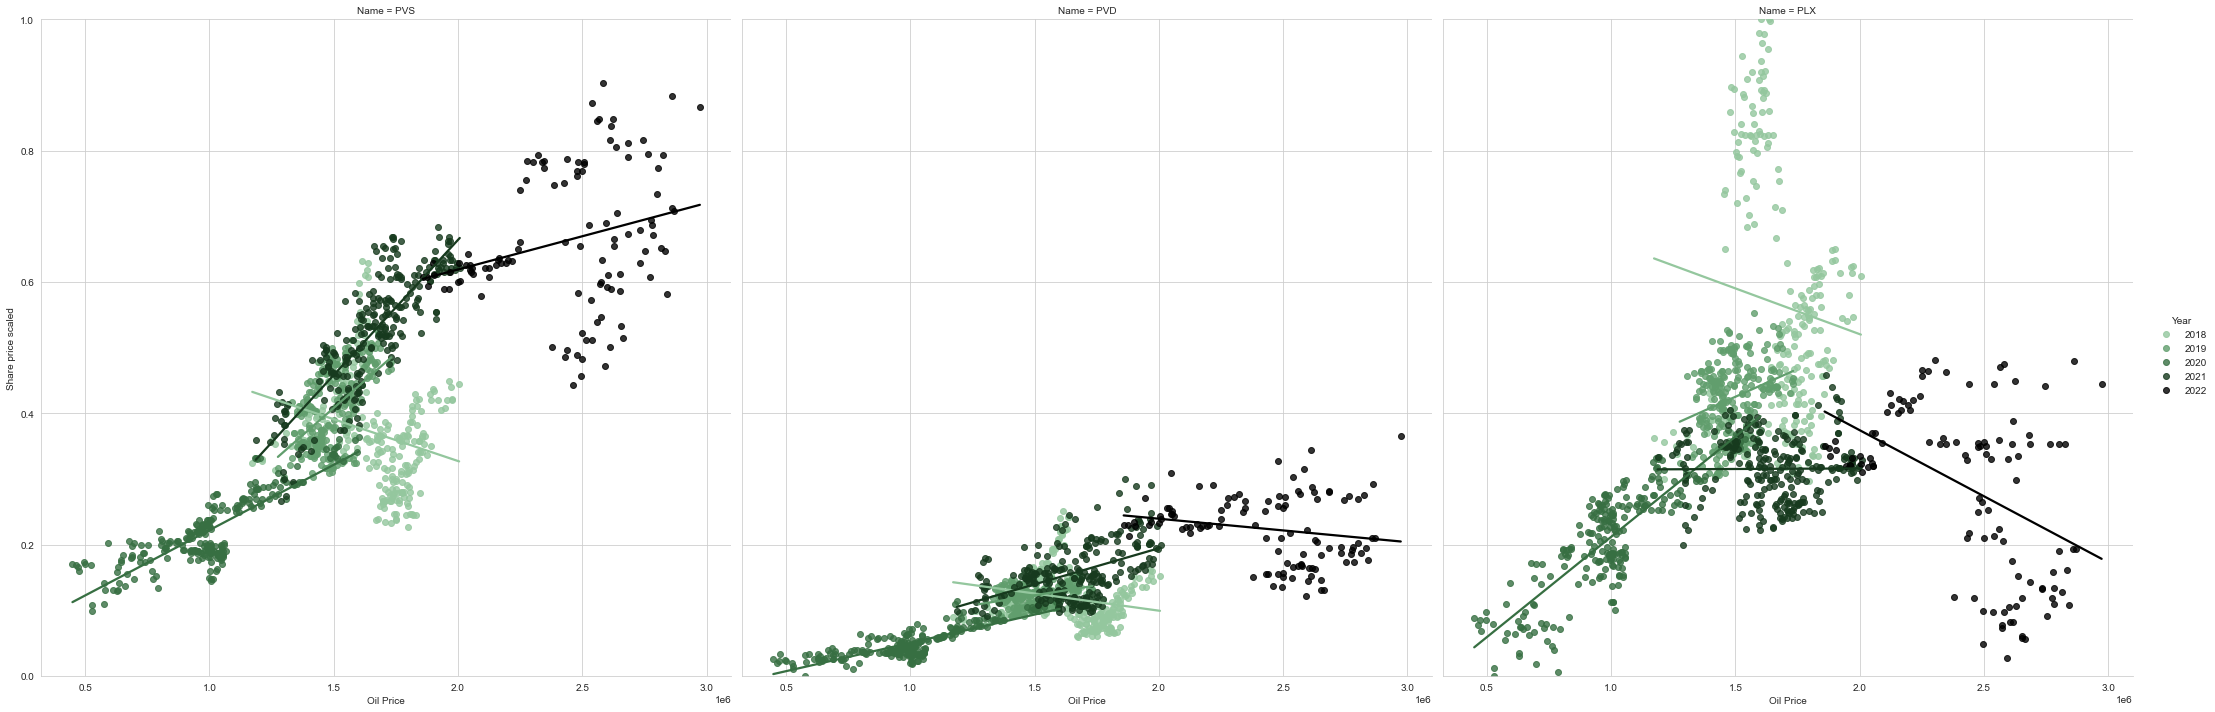

In [24]:
palette=sns.cubehelix_palette(5, start=2, rot=0, dark=0, light=.7, reverse=False)
sns.lmplot(x="Oil Price", y="Share price scaled",hue="Year", col="Name",ci=None, 
           col_wrap=3, data=all_data18, order=1,palette=palette,size=10).set(ylim=(0, 1))

# 3. MACHINE LEARNING AND PREDITION
Here is an outline of the machine learning problems:

3.1 Cluster analysis on data

3.2 Linear regression on share price vs oil price

3.3 Random Forest on share price vs oil price
### 3.1 Cluster analysis on data

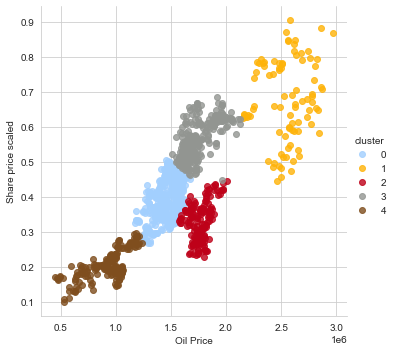

In [25]:
from sklearn.cluster import KMeans

shell=pd.DataFrame()
shell=all_data18[all_data18['Name']=="PVS"]
# We need to scale also oil price, so clustering is not influenced by the relative size of one axis.
shell["Oil price scaled"]=scaler.fit_transform(shell["Oil Price"].to_frame())
shell["cluster"] = KMeans(n_clusters=5, random_state=1).fit_predict(shell[["Share price scaled","Oil price scaled"]])

colors = ["baby blue", "amber", "scarlet", "grey","milk chocolate", "windows blue"]
palette=sns.xkcd_palette(colors)

sns.lmplot(x="Oil Price", y="Share price scaled",ci=None,palette=palette, hue="cluster",fit_reg=0 ,data=shell)

### 3.2 Linear regression on share price vs oil price

In [26]:
from sklearn import linear_model

# 1.- Data preparation
shell18=pd.DataFrame()
shell18=all_data18[(all_data18['Name']=="PVS") & (all_data18['Year']>2017 )] 
shell18=shell18[["Share price","Oil Price"]]

# Just using 1 variable for linear regression. To try with more variables use randomforest
# Split the data into training/testing sets
train = shell18[:-200]
test = shell18[-200:]

x_train=train["Oil Price"].to_frame() #converts the pandas Series to numpy.ndarray
y_train=train['Share price'].to_frame()
x_test=test["Oil Price"].to_frame() #converts the pandas Series to numpy.ndarray
y_test=test['Share price'].to_frame()

# 2.- Create linear regression object
regr = linear_model.LinearRegression()

# 3.- Train the model using the training sets
regr.fit(x_train,y_train)

# The coefficients
print("Coefficients: ",  float(regr.coef_))
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(x_train) - y_train) ** 2))

Coefficients:  0.00965429114148947
Mean squared error: 10057942.18


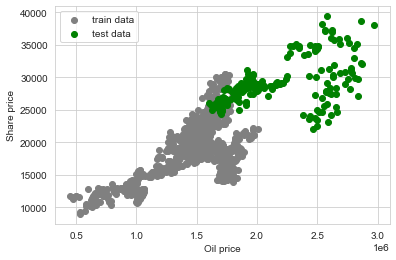

In [28]:
# Plot outputs using matplotlib
plt_train=plt.scatter(x_train, y_train,  color='grey')
plt_test=plt.scatter(x_test, y_test,  color='green')
plt.xlabel("Oil price")
plt.ylabel("Share price")
plt.legend((plt_train, plt_test),("train data", "test data"))
plt.show()

### 3.3 Random Forest on share price vs oil price

In [29]:
from sklearn.ensemble import RandomForestRegressor
# 1.- Data preparation
shell18=pd.DataFrame()
shell18=all_data18[(all_data18['Name']=="PVS") & (all_data18['Year']>2018 )] 
shell18=shell18[["Share price","Oil Price"]].reset_index()

# Load share price of other variables
shell18['PVD']=all_data18[(all_data18['Name']=="PVD") & (all_data18['Year']>2018) ].reset_index()['Share price']
shell18['PLX']=all_data18[(all_data18['Name']=="PLX") & (all_data18['Year']>2018 ) ].reset_index()['Share price']

train = shell18[:-200]
test = shell18[-200:]

x_train=train[["Oil Price","PVD","PLX"]]

y_train=train['Share price']

x_test=test[["Oil Price","PVD","PLX"]] 
y_test=test['Share price'].to_frame()


# 2.- Create Randomforest object usinig a max depth=5
regressor = RandomForestRegressor(n_estimators=50, max_depth=5 )

# 3.- Train data
clf=regressor.fit(x_train, y_train)

# 4.- Predict!
y_pred=regressor.predict(x_test)
y_pred=pd.DataFrame(y_pred)

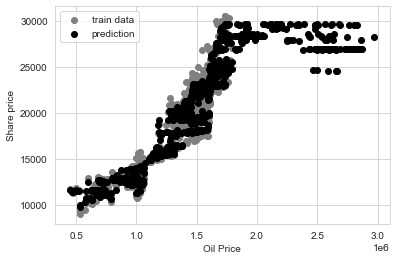

In [31]:
# We are going to have a look at how fitted data looks like:
plt_train=plt.scatter(x_train["Oil Price"],y_train, color='grey')
plt_pred=plt.scatter(shell18["Oil Price"], regressor.predict(shell18[["Oil Price","PVD","PLX"]])
                     ,  color='black')

plt.xlabel("Oil Price")
plt.ylabel("Share price")
plt.legend((plt_train,plt_pred),("train data","prediction"))
plt.show()

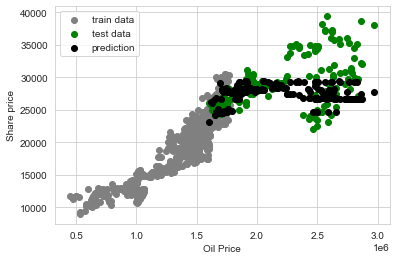

In [ ]:
plt_train=plt.scatter(x_train["Oil Price"],y_train, color='grey')
plt_test=plt.scatter(x_test["Oil Price"],y_test, color='green')
plt_pred=plt.scatter(x_test["Oil Price"], y_pred, color='black')

plt.xlabel("Oil Price")
plt.ylabel("Share price")
plt.legend((plt_train, plt_test,plt_pred),("train data", "test data","prediction"))
plt.show()

In [ ]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regressor.predict(x_train) - y_train) ** 2))

Mean squared error: 814961.56


Feature ranking:
Feature Oil Price (0.182128)
Feature PVD (0.784583)
Feature PLX (0.033289)


Text(0, 0.5, 'Importance')

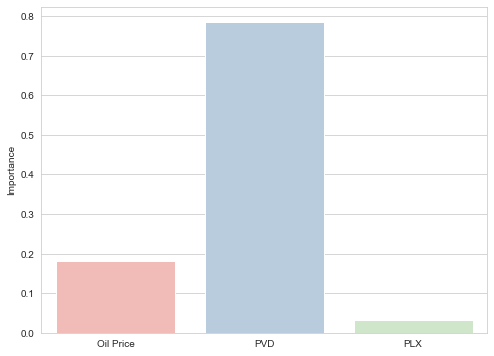

In [ ]:
importances=regressor.feature_importances_

indices=list(x_train)
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("Feature %s (%f)" % (indices[f], importances[f]))

f, (ax1) = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
sns.barplot(indices, importances, palette="Pastel1", ax=ax1)
ax1.set_ylabel("Importance")